<a href="https://colab.research.google.com/github/arunkrishnanppp/Cancer_prediction_KNN/blob/main/KNN_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files


In [ ]:
uploaded=files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


In [ ]:
dataframe=pd.read_csv("Breast_Cancer.csv")
df=dataframe.drop('id',axis=1)




In [ ]:
print(df)

    diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


In [ ]:
X=df.iloc[:,1:].values
Y=df['diagnosis'].values

In [ ]:
# print(X)
# print(Y)

In [ ]:
#normaliziing the value
from sklearn.preprocessing import Normalizer


In [ ]:
transformer = Normalizer().fit(X)
normalised_X=transformer.transform(X)
# print(normalised_X)

In [ ]:
#Dividing in train and test set
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(normalised_X,Y)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

426
143
426
143


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)
pred=KNN.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9440559440559441
[[87  3]
 [ 5 48]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        90
           M       0.94      0.91      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
#finding k 
from sklearn.model_selection import cross_val_score


In [ ]:
accuracy_rate=[]
for i in range(1,20):
  knni=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knni,normalised_X,Y,cv=10)
  accuracy_rate.append(score.mean())

In [ ]:
#Ploting grpah
import matplotlib.pyplot as plt


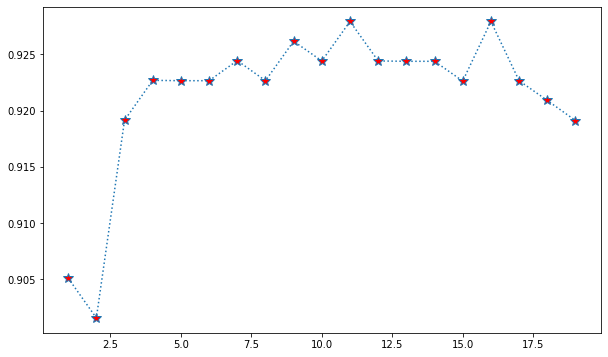

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,linestyle=':',marker='*',markerfacecolor='red',markersize=10)

In [ ]:
#Now use 16 as k value
KNN16=KNeighborsClassifier(n_neighbors=11)
KNN16.fit(X_train,Y_train)
pred16=KNN16.predict(X_test)
print(accuracy_score(Y_test,pred16))
print(confusion_matrix(Y_test,pred16))
print(classification_report(Y_test,pred16))

0.951048951048951
[[90  0]
 [ 7 46]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        90
           M       1.00      0.87      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.95       143
weighted avg       0.95      0.95      0.95       143

